In [27]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


Limpieza de Datos:

El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:

* Identificar y abordar cualquier valor duplicado.
* Identificar y abordar cualquier dato que falte en este conjunto de datos. Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
* Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.
* Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).
* Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).



In [2]:
def cargar_datos(ruta_archivo):
    # Carga los datos del archivo CSV
    datos = pd.read_csv(ruta_archivo, delimiter=',')
    return datos
##Se realiza la carga con Pandas ya que numpy no muestra los valores categoricos
if __name__ == "__main__":
    ruta_archivo = '../trabajos_core/data/user_app_data.csv'
    df = cargar_datos(ruta_archivo)  

print(df.head())

##Imprime ultimas 5 filas
print("nÚltimas 5 filas del DataFrame:")
print(df.tail(5))
##Imprime informacion del dataframe
print("nInformación del DataFrame:")
print(df.info())
## Imprime estadistica descriptiva del DF
print("nEstadísticas descriptivas del DataFrame:")
print(df.describe())

   user_id  app_version platform  session_duration  number_of_sessions  \
0        1          1.2  Android               109                  11   
1        2          1.3  Android               116                  17   
2        3          1.0  Android                94                  13   
3        4          1.2      iOS                47                   1   
4        5          1.2      iOS                99                   2   

  country  user_feedback  
0  France              1  
1      UK              2  
2  France              5  
3  Canada              4  
4  Canada              3  
nÚltimas 5 filas del DataFrame:
     user_id  app_version platform  session_duration  number_of_sessions  \
295      296          1.3      iOS                33                   4   
296      297          1.1  Android               118                   6   
297      298          1.2  Android                65                   1   
298      299          1.0      iOS               146     

In [3]:
##Limpieza de datos
##Verificar datos duplicados
#Deteccion de valores duplicados
print("elementos duplicados: ", df.duplicated().sum())

###No se detectaron elementos duplicados, sin embargo si ubiera alguno
df.drop_duplicates(inplace = True) ## eliminacion de filas duplicadas en filas con afectacion directa al dataframe

##identificar columnas con null
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)
## No se encuentran valores nulos sin embargo aqui un metodo para agregar los valores que sean str con la palabra desconocido y interpolar en caso de ser datos numericos o flotantes
##Se crea metodo para asignar valores por tipo de datos en todos los casos.
def manejar_nulos(datos):
    for column in datos.columns:
        if datos[column].dtype == 'object':
            datos[column] = datos[column].fillna('Desconocido')
        elif datos[column].dtype in ['int64', 'float']:
            datos[column].fillna(datos[column].interpolate())

manejar_nulos(df)

##Detallado de valores nulos por columna
# Esto permite determinar cuántos valores en cada columna tienen datos cargados
qsna = df.shape[0] - df.isnull().sum(axis=0)

# Calcula la cantidad de valores nulos en cada columna del DataFrame
qna = df.isnull().sum(axis=0)

# Calcula el porcentaje de valores nulos en cada columna y redondea a 2 decimales
ppna = round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)

# Crea un diccionario auxiliar con la cantidad de datos sin nulos, cantidad de nulos y porcentaje de nulos
aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}

# Convierte el diccionario en un DataFrame
na = pd.DataFrame(data=aux)

# Ordena el DataFrame por el porcentaje de valores nulos en orden descendente
na.sort_values(by='Na en %', ascending=False)


elementos duplicados:  0
user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64


,datos sin NAs en q,Na en q,Na en %
user_id,300,0,0.0
app_version,300,0,0.0
platform,300,0,0.0
session_duration,300,0,0.0
number_of_sessions,300,0,0.0
country,300,0,0.0
user_feedback,300,0,0.0


In [4]:
### Asegurarse de que las columnas tengan formato adecuado
##Verificacion y ajustes de tipos de datos
df.info()

##Modificar el tipo de dato, para este caso los datos estan correctos, sin embargo es importante asegurarse de esto por lo que se procede a crear metodo de modificacion
#Usando Dic para modificar el tipo de datos. Sacado de sitio web https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
convert_dict = {'platform': str,
                'country': str,
                }
df = df.astype(convert_dict)
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


user_id                 int64
app_version           float64
platform               object
session_duration        int64
number_of_sessions      int64
country                object
user_feedback           int64
dtype: object

In [8]:
##Identificar y abordar inconsistencias
print(sorted(df['platform'].unique()))
print(sorted(df['country'].unique()))
##Se cambiar str to upper y strip. Revisado en link:https://stackoverflow.com/questions/39512002/convert-whole-dataframe-from-lower-case-to-upper-case-with-pandas  
df.apply(lambda x: x.astype(str).str.upper())

['Android', 'iOS']
['Canada', 'France', 'Germany', 'Italy', 'Mexico', 'Spain', 'UK', 'USA']


,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,ANDROID,109,11,FRANCE,1
1,2,1.3,ANDROID,116,17,UK,2
2,3,1.0,ANDROID,94,13,FRANCE,5
3,4,1.2,IOS,47,1,CANADA,4
4,5,1.2,IOS,99,2,CANADA,3
...,...,...,...,...,...,...,...
295,296,1.3,IOS,33,4,UK,1
296,297,1.1,ANDROID,118,6,GERMANY,2
297,298,1.2,ANDROID,65,1,GERMANY,5
298,299,1.0,IOS,146,5,FRANCE,5


     user_id  app_version platform  session_duration  number_of_sessions  \
6          7          1.0      iOS               168                   3   
29        30          1.3      iOS                58                   1   
35        36          1.0      iOS               118                   2   
39        40          1.2      iOS               129                   1   
53        54          1.3      iOS               144                   2   
62        63          1.0  Android                69                   1   
76        77          1.3      iOS               160                   2   
92        93          1.1      iOS               168                   3   
116      117          1.0  Android               157                   1   
124      125          1.0      iOS               177                   2   
157      158          1.1      iOS               144                   2   
172      173          1.2  Android               142                   1   
185      186

<Axes: xlabel='minutos_x_sesion'>

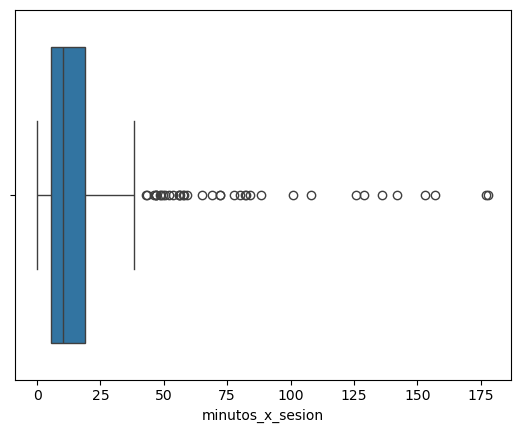

In [25]:
df['minutos_x_sesion'] = df['session_duration']/df['number_of_sessions']
#Crear una nueva columna 'total_hours_per_day' con el cálculo de horas por día
df['total_hours_per_day'] = (df['session_duration'] * df['number_of_sessions']) / 60
#print(df.head())

# Función para detectar outliers usando IQR en todas las columnas numéricas
def detectar_outliers_iqr(df, col_valor):

    # Iterar sobre todas las columnas numéricas
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)##Calcular los cuartiles por columna
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = df[(df[col_valor] < limite_inferior) | (df[col_valor] > limite_superior)]
    
    return outliers

# Usar la función
outliers_detectados = detectar_outliers_iqr(df, 'minutos_x_sesion')
print(outliers_detectados)


import seaborn as sns
sns.boxplot(x=df['minutos_x_sesion'])
##Observaciones: Se pueden verificar que el calculo minutos por sesion se presentan algunos outliers los cuales segun el grafico de boxplot se encuentran en 
#gran catidad. Ademas, se visualiza como resultado del metodo de detectar_outliers_iqr la lista de estos outliers, los cuales deberan ser modificados para su analisis

   user_id  app_version platform  session_duration  number_of_sessions  \
0        1          1.2  Android               109                  11   
1        2          1.3  Android               116                  17   
2        3          1.0  Android                94                  13   
3        4          1.2      iOS                47                   1   
4        5          1.2      iOS                99                   2   

  country  user_feedback  minutos_x_sesion  total_hours_per_day  
0  France              1          9.909091            19.983333  
1      UK              2          6.823529            32.866667  
2  France              5          7.230769            20.366667  
3  Canada              4         18.862500             0.783333  
4  Canada              3         18.862500             3.300000  
Empty DataFrame
Columns: [user_id, app_version, platform, session_duration, number_of_sessions, country, user_feedback, minutos_x_sesion, total_hours_per_day]


<Axes: xlabel='minutos_x_sesion'>

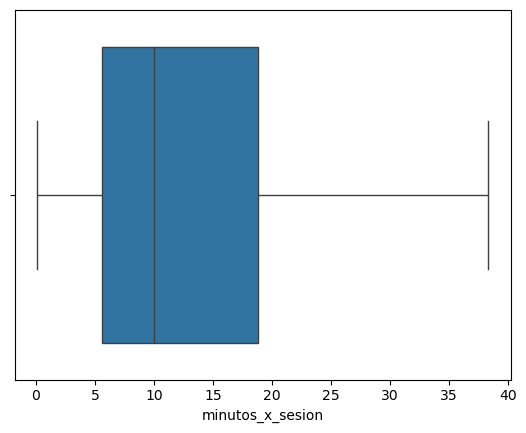

In [26]:
def reemplazar_outliers_por_cuartil(df, col_valor):
    df_corregido = df.copy()  # Hacer copia del dataframe original

    df_corregido[col_valor] = df_corregido[col_valor].astype(float)  # Asegurarse de que la columna sea tipo float

    Q1 = df[col_valor].quantile(0.25)  # Calcular el primer cuartil
    Q3 = df[col_valor].quantile(0.75)  # Calcular el tercer cuartil
    IQR = Q3 - Q1  # Calcular el rango intercuartílico

    # Definir los límites inferior y superior para los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Reemplazar outliers inferiores por Q1
    df_corregido.loc[df[col_valor] < limite_inferior, col_valor] = Q1

    # Reemplazar outliers superiores por Q3
    df_corregido.loc[df[col_valor] > limite_superior, col_valor] = Q3

    return df_corregido

# Aplicar la función para reemplazar outliers en una sola columna usando cuartiles
df_corregido = reemplazar_outliers_por_cuartil(df, 'minutos_x_sesion')

print(df_corregido.head())  # Imprimir el nuevo dataframe corregido
outliers_detectados = detectar_outliers_iqr(df_corregido, 'minutos_x_sesion')
print(outliers_detectados)

sns.boxplot(x=df_corregido['minutos_x_sesion'])


Se observan que ya no existen outliers dentro de la columna minutos_x_sesion luego de aplicar la funcion reemplazar_outliers_por_cuartil, el cual modifica sus valores de acuerdo al cuartil cercano en el que se encuentran

Exploración de Datos:

El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:

* Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


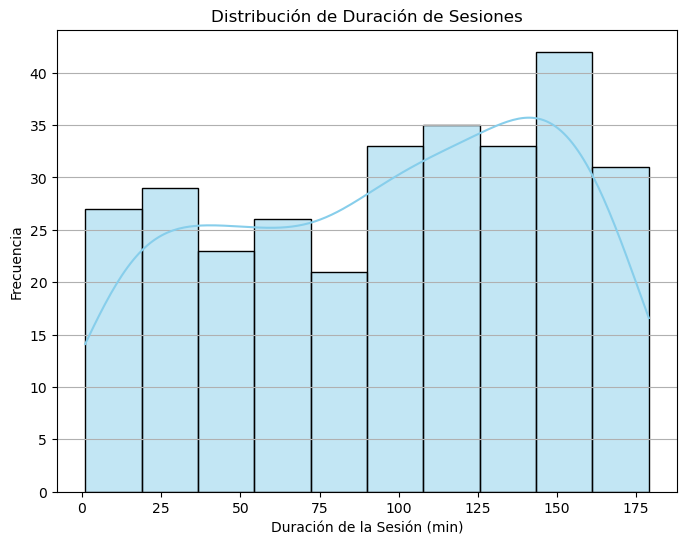

In [40]:
# Histograma para session_duration
plt.figure(figsize=(8, 6))
sns.histplot(df['session_duration'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de Duración de Sesiones')
plt.xlabel('Duración de la Sesión (min)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

Se puede observar en este grafico que la mayor concentracion de usuarios tienen duracion entre 0 y 50 minuntos. Sin embargo, existe un numero considerable de usaurios que dedicarion un tiempo considerable de 125 a 150 minutos. Finalmente, a pesar de los picos mencionados, se puede ver que la distribucion es relativamente uniforme a lo largo del rango

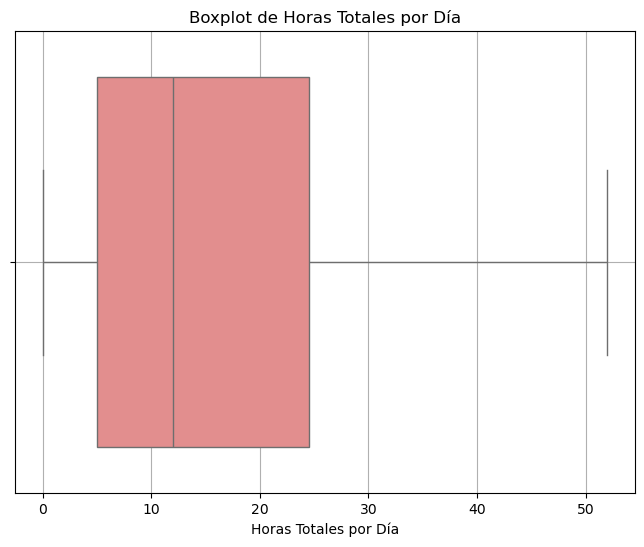

In [39]:
# Boxplot para total_hours_per_day
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total_hours_per_day'], color='lightcoral')
plt.title('Boxplot de Horas Totales por Día')
plt.xlabel('Horas Totales por Día')
plt.grid()
plt.show()

En este grafico de boxplot se puede observar que no existen datos fuera del rango medio o outliers para la columna horas totales por dia

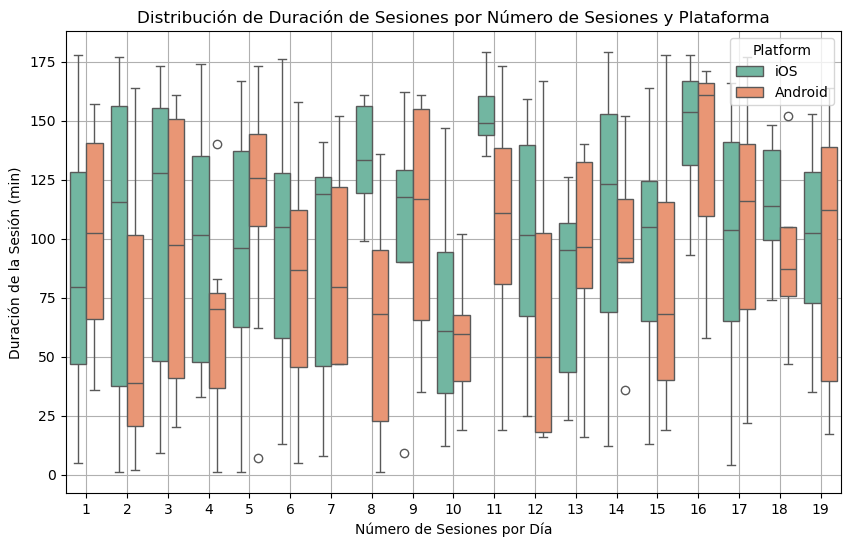

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='number_of_sessions', y='session_duration', hue='platform', data=df, palette='Set2')
plt.title('Distribución de Duración de Sesiones por Número de Sesiones y Plataforma')
plt.xlabel('Número de Sesiones por Día')
plt.ylabel('Duración de la Sesión (min)')
plt.grid()
plt.legend(title='Platform')
plt.show()

El tamaño de las cajas y la longitud de los bigotes nos indican que existe una considerable variabilidad en la duración de las sesiones, tanto entre usuarios de iOS y Android. Ademas, tampoco se observan diferencias significativas entre el uso de android y iOS. Tambien se observan outliers o comportamientos atipicos de los usuarios.

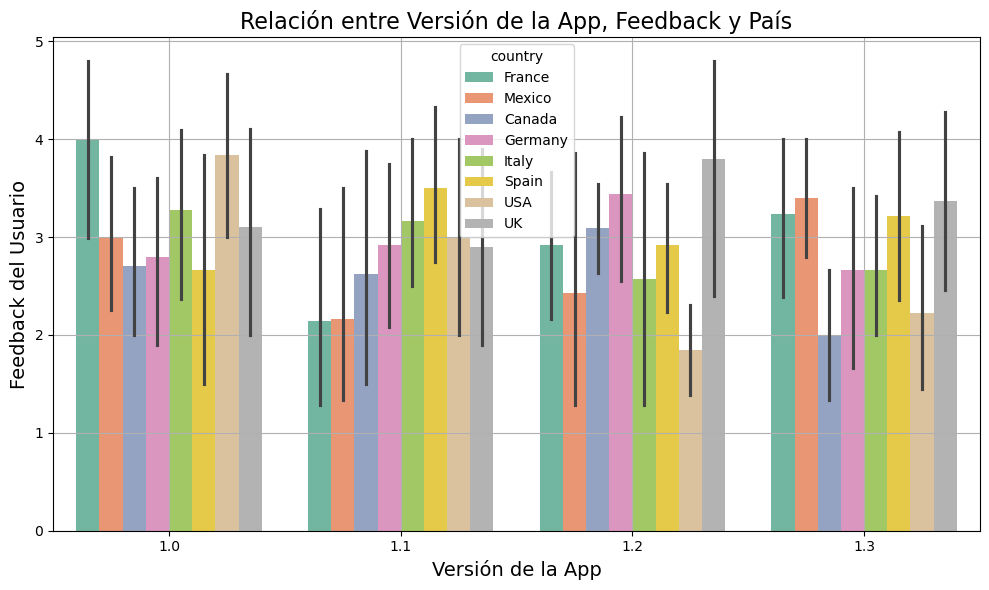

In [43]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras agrupadas
sns.barplot(data=df, x='app_version', y='user_feedback', hue='country', palette='Set2')

# Título y etiquetas
plt.title("Relación entre Versión de la App, Feedback y País", fontsize=16)
plt.xlabel("Versión de la App", fontsize=14)
plt.ylabel("Feedback del Usuario", fontsize=14)

# Añadir una cuadrícula y mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos observar en el grafico que el feedback varia considerablemente entre las diferentes versiones de la aplicacion y los distintos paises. Esto sugiere que ciertas actualizaciones de la app han tenido un impacto mayor en algunos países que en otros.